In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import metrics
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Membaca data dari file CSV
data = pd.read_csv('data.csv', sep=';')

# Mengambil kolom tahun dan jumlah sebagai array NumPy
tahun = data['tahun'].values
penerimaan = data['jumlah'].values

# Normalisasi data
scaler = MinMaxScaler()
penerimaan_normalized = scaler.fit_transform(penerimaan.reshape(-1, 1))

# Membagi data menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(tahun, penerimaan_normalized, test_size=0.2, random_state=42)

# Membangun model ANN
model = keras.Sequential([
    keras.layers.Input(shape=(1,)),  # Input layer
    keras.layers.Dense(14, activation='relu'),  # Hidden layer dengan 16 neuron
    keras.layers.Dense(1)  # Output layer dengan 1 neuron
])

# Menentukan optimizer, fungsi loss, dan metrik
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X_train, y_train, epochs=1000, validation_data=(X_val, y_val), verbose=0)

# Melakukan prediksi untuk tahun selanjutnya (misalnya tahun ke-2024)
tahun_selanjutnya = np.array([2024])
prediksi_normalized = model.predict(tahun_selanjutnya)
prediksi = scaler.inverse_transform(prediksi_normalized)

1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 20ms/step


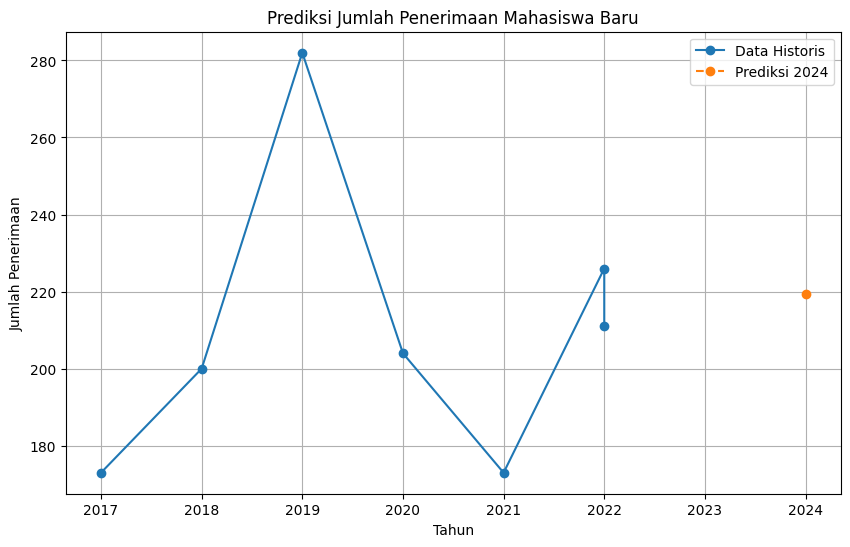

Prediksi jumlah penerimaan mahasiswa baru untuk tahun 2024: 219.2584228515625
Mean Squared Error (MSE): 0.10486504212834726
Root Mean Square Error (RMSE): 0.32


In [2]:
# Menghitung MSE
mse = metrics.mean_squared_error(y_val, model.predict(X_val))

# Menghitung RMRE
rmse = np.sqrt(metrics.mean_squared_error(y_val, model.predict(X_val)))

# Visualisasi data historis dan prediksi
plt.figure(figsize=(10, 6))
plt.plot(tahun, penerimaan, label='Data Historis', marker='o')
plt.plot(tahun_selanjutnya, prediksi, label='Prediksi 2024', marker='o', linestyle='--')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penerimaan')
plt.legend()
plt.grid(True)
plt.title('Prediksi Jumlah Penerimaan Mahasiswa Baru')
plt.show()

print(f"Prediksi jumlah penerimaan mahasiswa baru untuk tahun 2024: {prediksi[0][0]}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")